In [6]:
import xarray as xr # For working with NetCDF files as xarray objects
import matplotlib.pyplot as plt


file = '/home/raul/TFM/Data/CHELSA/CHELSA_pr_1981-2010_V.2.1.nc' # mention the path to the downloaded file
file_2 = '/home/raul/TFM/Data/CHELSA/1991-2020/chelsav2/EUR11/obs/annual/V2.1/cdd/CHELSA_EUR11_obs_cdd_1992_V.2.1.nc'
file_3 = '/home/raul/TFM/Data/CHELSA/1991-2020/chelsav2/EUR11/obs/annual/V2.1/prsd/CHELSA_EUR11_obs_prsd_1991_V.2.1.nc'

In [8]:
xrds = xr.open_dataset(file_3)
xrds

<xarray.Dataset> Size: 320MB
Dimensions:    (time: 1, bnds: 2, lon: 13147, lat: 6077)
Coordinates:
  * time       (time) datetime64[ns] 8B 1991-07-02
  * lon        (lon) float64 105kB -44.64 -44.63 -44.62 ... 64.9 64.9 64.91
  * lat        (lat) float64 49kB 21.97 21.98 21.99 22.0 ... 72.59 72.6 72.6
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 16B ...
    crs        int32 4B ...
    pr         (time, lat, lon) float32 320MB ...
Attributes:
    CDI:                 Climate Data Interface version 1.9.9rc1 (https://mpi...
    Conventions:         CF-1.5
    history:             Mon Jan 30 17:44:41 2023: cdo -b 32 timstd /storage/...
    institution:         Swiss Federal Institute for Forest\
    GDAL_AREA_OR_POINT:  Area
    GDAL:                GDAL 2.2.3, released 2017/11/20
    title:               CHELSA V2.1
    project:             CHELSA - Climatologies at high resolution for the ea...
    contact:             Dirk N. Karger\
    references:          Karger DN. et al. Climatologies at high resolution f...
    doi:                 doi: 10.16904/envidat.228.v2.1
    CDO:                 Climate Data Operators version 1.9.9rc1 (https://mpi...

(array([4.32420554e+08, 5.39389000e+05, 6.70800000e+03, 3.37000000e+02,
        8.00000000e+00, 0.00000000e+00, 1.20000000e+01, 0.00000000e+00,
        1.20000000e+01, 6.60000000e+02]),
 array([ 0.        ,  6.55350018, 13.10700035, 19.66050148, 26.2140007 ,
        32.76750183, 39.32100296, 45.87450409, 52.4280014 , 58.98150253,
        65.53500366]),
 <BarContainer object of 10 artists>)

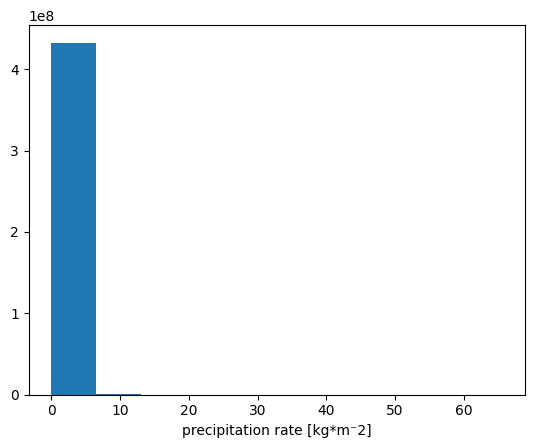

In [7]:
xrds['pr'].plot.hist()

In [14]:
desired_date = '2000'
data_for_desired_date = xrds
data_for_desired_date

<xarray.Dataset> Size: 2GB
Dimensions:       (lon: 8640, lat: 4176, time (month): 12)
Coordinates:
  * lon           (lon) float64 69kB -180.0 -180.0 -179.9 ... 179.9 179.9 180.0
  * lat           (lat) float64 33kB 83.96 83.92 83.88 ... -89.91 -89.95 -90.0
  * time (month)  (time (month)) int32 48B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    crs           int32 4B ...
    pr            (time (month), lat, lon) float32 2GB 0.084 0.084 ... 0.04227
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.3-13)
    date:         2021-06-03 17:27:12

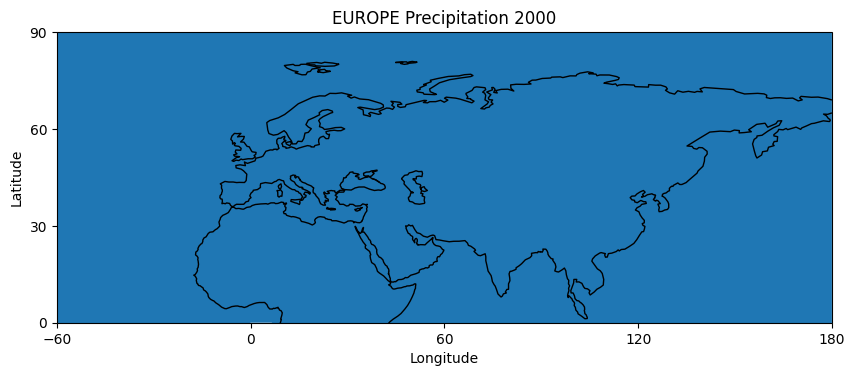

In [22]:
import cartopy.crs as ccrs
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
data_for_desired_date['pr'].plot(ax=ax,transform=ccrs.PlateCarree())
ax.coastlines()
plt.title(f'EUROPE Precipitation {desired_date}')
ax.set_xticks(range(-60, 181, 60), crs=ccrs.PlateCarree())
ax.set_yticks(range(0, 91, 30), crs=ccrs.PlateCarree())
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
#plt.savefig('../data/media/temperature_anomalies.png')
plt.show()

In [18]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=10, central_latitude=50))

data_for_desired_date['pr'].plot(ax=ax, transform=ccrs.PlateCarree())  # Using PlateCarree for data transformation
ax.coastlines()  # Draw coastlines
ax.set_xticks(range(-30, 61, 15), crs=ccrs.PlateCarree())  # Focus tick marks on European region
ax.set_yticks(range(30, 71, 10), crs=ccrs.PlateCarree())  
ax.set_title(f'Global Surface Temperature Anomalies for {desired_date}')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


RuntimeError: Cannot handle non-rectangular coordinate systems.

/home/raul/miniconda3/envs/chelsa_env/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


In [19]:
print(data_for_desired_date['pr'].coords)

Coordinates:
  * lon           (lon) float64 69kB -180.0 -180.0 -179.9 ... 179.9 179.9 180.0
  * lat           (lat) float64 33kB 83.96 83.92 83.88 ... -89.91 -89.95 -90.0
  * time (month)  (time (month)) int32 48B 1 2 3 4 5 6 7 8 9 10 11 12


### Trying to open the chelsa patches!

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

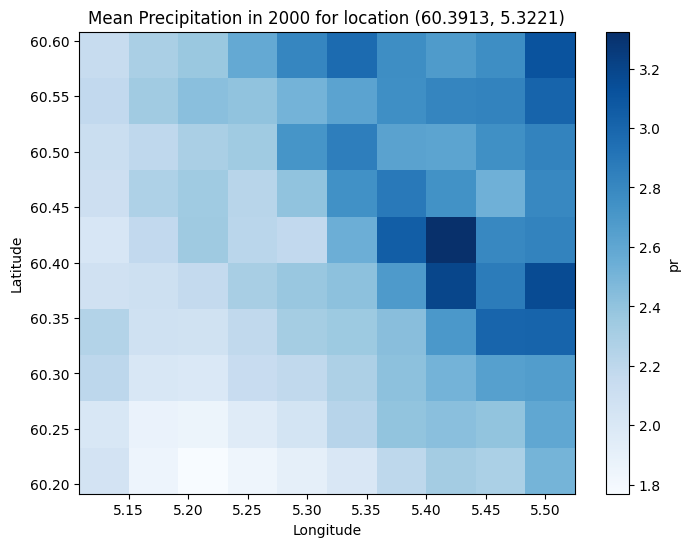

In [2]:
# Load the NetCDF file
file_path = "CHELSA/CHELSA_pr_1981-2010_V.2.1.nc"
data = xr.open_dataset(file_path)

# Choose the coordinates for Bergen, Norway
latitude = 60.3913
longitude = 5.3221

# Step 1: Find the indices of the closest grid point
lat_idx = np.argmin(np.abs(data['lat'].values - latitude))
lon_idx = np.argmin(np.abs(data['lon'].values - longitude))

# Step 2: Select all months of the year (time as integers 1 to 12)
precipitation_2000 = data.sel(**{"time (month)": slice(1, 12)})

# Step 3: Extract the 10x10 grid around the chosen location
precip_variable = "pr"
patch = precipitation_2000[precip_variable].isel(
    lat=slice(lat_idx - 5, lat_idx + 5),
    lon=slice(lon_idx - 5, lon_idx + 5)
)

# Step 4: Calculate the mean precipitation across all months
mean_patch = patch.mean(dim="time (month)").dropna(dim="lat", how="all").dropna(dim="lon", how="all")

# Step 5: Plot the precipitation
plt.figure(figsize=(8, 6))
mean_patch.plot(cmap="Blues")
plt.title(f"Mean Precipitation in 2000 for location ({latitude}, {longitude})")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [3]:
print(data)


<xarray.Dataset> Size: 2GB
Dimensions:       (lon: 8640, lat: 4176, time (month): 12)
Coordinates:
  * lon           (lon) float64 69kB -180.0 -180.0 -179.9 ... 179.9 179.9 180.0
  * lat           (lat) float64 33kB 83.96 83.92 83.88 ... -89.91 -89.95 -90.0
  * time (month)  (time (month)) int32 48B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    crs           int32 4B ...
    pr            (time (month), lat, lon) float32 2GB ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.3-13)
    date:         2021-06-03 17:27:12


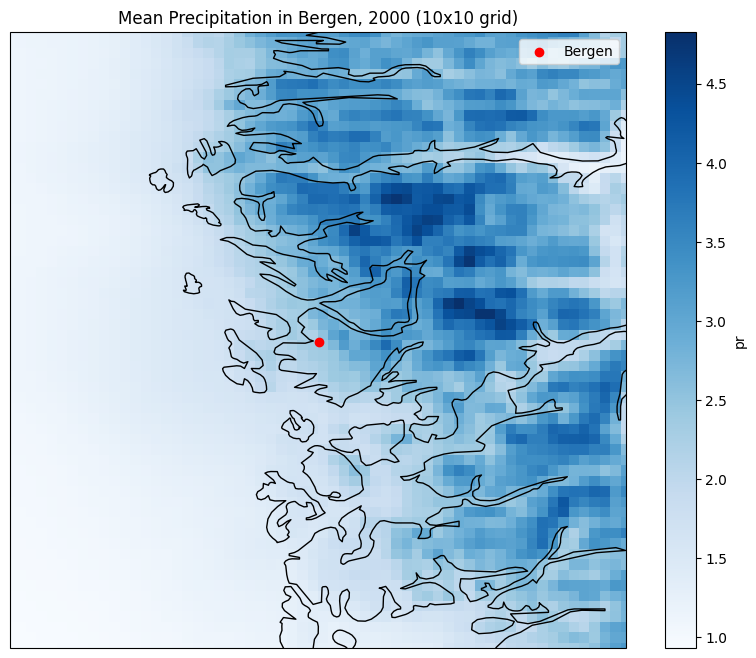

In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the NetCDF file
file_path = "CHELSA/CHELSA_pr_1981-2010_V.2.1.nc"
data = xr.open_dataset(file_path)

# Choose the coordinates for Bergen, Norway
latitude = 60.3913
longitude = 5.3221

# Step 1: Find the indices of the closest grid point
lat_idx = np.argmin(np.abs(data['lat'].values - latitude))
lon_idx = np.argmin(np.abs(data['lon'].values - longitude))

# Step 2: Select all months of the year 2000
precipitation_2000 = data.sel(**{"time (month)": slice(1, 12)})

# Step 3: Extract a 10x10 grid centered around Bergen
precip_variable = "pr"
patch = precipitation_2000[precip_variable].isel(
    lat=slice(lat_idx - 30, lat_idx + 30),
    lon=slice(lon_idx - 30, lon_idx + 30)
)

# Step 4: Calculate the mean precipitation across all months
mean_patch = patch.mean(dim="time (month)")

# Step 5: Plot with Cartopy for map context
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())  # PlateCarree assumes latitude/longitude

# Plot the precipitation data
mean_patch.plot(ax=ax, cmap="Blues", transform=ccrs.PlateCarree(), add_colorbar=True)

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')  # Country borders
ax.add_feature(cfeature.COASTLINE, edgecolor='black')               # Coastline
ax.set_extent([mean_patch.lon.min(), mean_patch.lon.max(), mean_patch.lat.min(), mean_patch.lat.max()])

# Add city marker for Bergen
plt.scatter(longitude, latitude, color="red", label="Bergen", transform=ccrs.PlateCarree())
plt.legend()

# Title and labels
plt.title("Mean Precipitation in Bergen, 2000 (10x10 grid)")
plt.show()


In [5]:
# Load the NetCDF file
def read_netcdf(file_path,latitude,longitude,variable,grid,location):
    data = xr.open_dataset(file_path)
    
    # Step 1: Find the indices of the closest grid point
    lat_idx = np.argmin(np.abs(data['lat'].values - latitude))
    lon_idx = np.argmin(np.abs(data['lon'].values - longitude))
    
    # Step 2: Select all months of the year
    precipitation= data.sel(**{"time (month)": slice(1, 12)})
    
    # Step 3: Extract a 10x10 grid centered around Bergen
    patch = precipitation[variable].isel(
        lat=slice(lat_idx - grid, lat_idx + grid),
        lon=slice(lon_idx - grid, lon_idx + grid)
    )
    
    # Step 4: Calculate the mean precipitation across all months
    mean_patch = patch.mean(dim="time (month)")
    
    # Step 5: Plot with Cartopy for map context
    plt.figure(figsize=(10, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())  # PlateCarree assumes latitude/longitude
    
    # Plot the precipitation data
    mean_patch.plot(ax=ax, cmap="Blues", transform=ccrs.PlateCarree(), add_colorbar=True)
    
    # Add map features
    ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')  # Country borders
    ax.add_feature(cfeature.COASTLINE, edgecolor='black')               # Coastline
    ax.set_extent([mean_patch.lon.min(), mean_patch.lon.max(), mean_patch.lat.min(), mean_patch.lat.max()])
    
    # Add city marker for Bergen
    plt.scatter(longitude, latitude, color="red", label=location, transform=ccrs.PlateCarree())
    plt.legend()
    
    # Title and labels
    plt.title(f"Mean Precipitation in {location}, (10x10 grid)")
    plt.show()

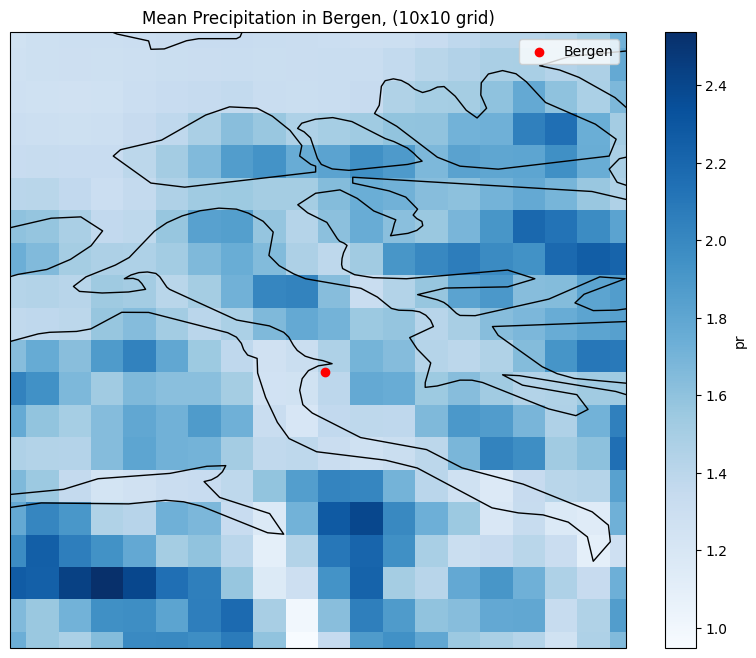

In [8]:
path = "CHELSA/CHELSA_pr_1981-2010_V.2.1.nc"
read_netcdf(file_path = path,
            latitude = 62.9,
            longitude = 8.2,
            variable = 'pr',
            grid = 10,
            location = 'Random Mountain')